# Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib

## Instructions:

- Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

## Resources:

Download the following datasets:
- earthquakes-1.csv,
- fb_stock_prices_2018.csv


Procedures:

- 9.1 Introduction to Matplotlib
  - https://github.com/KurtyMittens/CPE311_CTwithPy/tree/main/MODULE9/9.1%20Introduction%20to%20Matplotlib
- 9.2 Plotting with Pandas
  - https://github.com/KurtyMittens/CPE311_CTwithPy/tree/main/MODULE9/9.2%20Plotting%20with%20Pandas
- 9.3 Pandas Plotting Subpackage
  - https://github.com/KurtyMittens/CPE311_CTwithPy/tree/main/MODULE9/9.3%20Pandas%20Plotting%20Subpackage

## Data Analysis:

Provide comments on output from the procedures above.

## Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

In [177]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

equake = pd.read_csv('/content/earthquakes-1.csv') # for the earthquake data
fbprice = pd.read_csv('/content/fb_stock_prices_2018.csv', index_col = 'date', parse_dates=True) # for the FB price Data

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

<Axes: title={'center': 'Rolling 20-day minimum of the Facebook closing price'}, xlabel='date'>

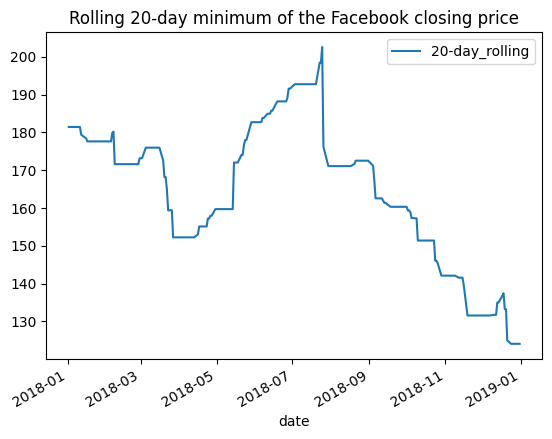

In [178]:
fbprice['20-day_rolling'] = fbprice.close.rolling('20D').min() # Minimum for 20 day rolling calculations
fbprice.plot(
    y = '20-day_rolling',
    title = 'Rolling 20-day minimum of the Facebook closing price'
)

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

Text(0.5, 0, 'Difference (open-close)')

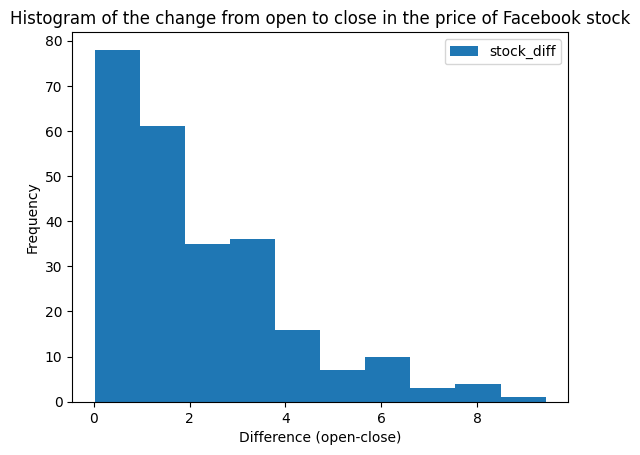

In [179]:
## HISTOGRAM
fbprice.assign(
    stock_diff = fbprice.open - fbprice.close
).abs().plot( # abs() to prevent negative number
    kind = 'hist', # Modifier
    y = 'stock_diff',
    title = 'Histogram of the change from open to close in the price of Facebook stock'
)
plt.xlabel('Difference (open-close)')

Text(0.5, 0, 'Difference (open-close)')

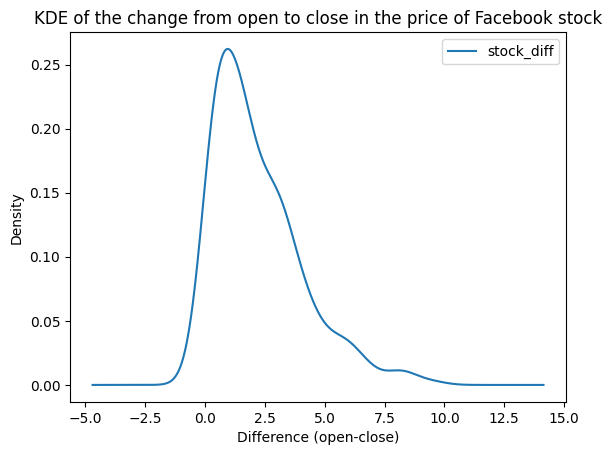

In [180]:
## KDE
fbprice.assign(
    stock_diff = fbprice.open - fbprice.close
).abs().plot( # abs() to prevent negative number
    kind = 'kde', # Modifier
    y = 'stock_diff',
    title = 'KDE of the change from open to close in the price of Facebook stock'
)
plt.xlabel('Difference (open-close)')

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

Text(0.5, 1, 'Magnitudes of each magType in Indonesia.')

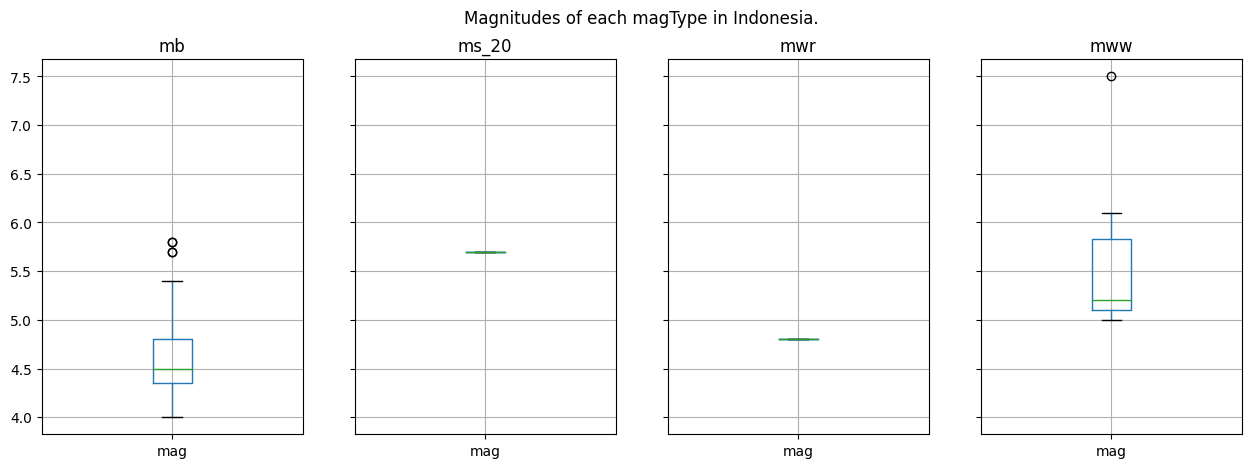

In [181]:
equake.query('parsed_place == "Indonesia"').groupby('magType').boxplot( # Grouping them to the magTypes in Indonesia
    column = 'mag', # only the mag column
    layout=(1,4), figsize=(15, 5) # Layout meaning row=1, column=4 in 1500*500 pixels
)
plt.suptitle('Magnitudes of each magType in Indonesia.', y=1)  # y pos of the subtitle

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

<Axes: title={'center': 'Weekly Maximum High and Minimum Low Price for Facebook'}, xlabel='date'>

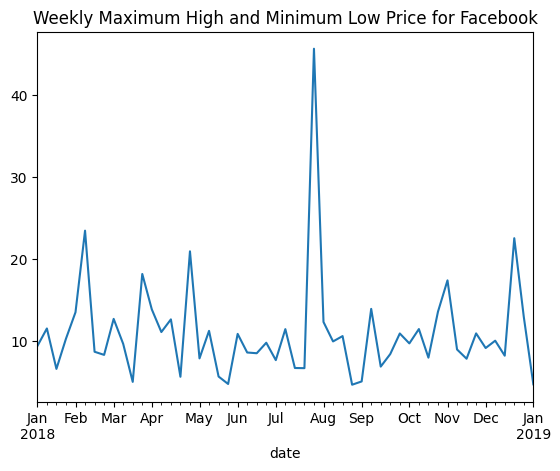

In [182]:
(fbprice.groupby(pd.Grouper(freq='W')).high.max() - fbprice.groupby(pd.Grouper(freq='W')).low.min()).plot(title='Weekly Maximum High and Minimum Low Price for Facebook')
# Grouping them per Week ('W') and ploting it direectlly: I added title

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:
- The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

- The second subplot will be a bar plot showing the net effect this had monthly, using resample().

- Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

- Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.



Index(['open', 'high', 'low', 'close', 'volume', '20-day_rolling',
       'openvsclose'],
      dtype='object')

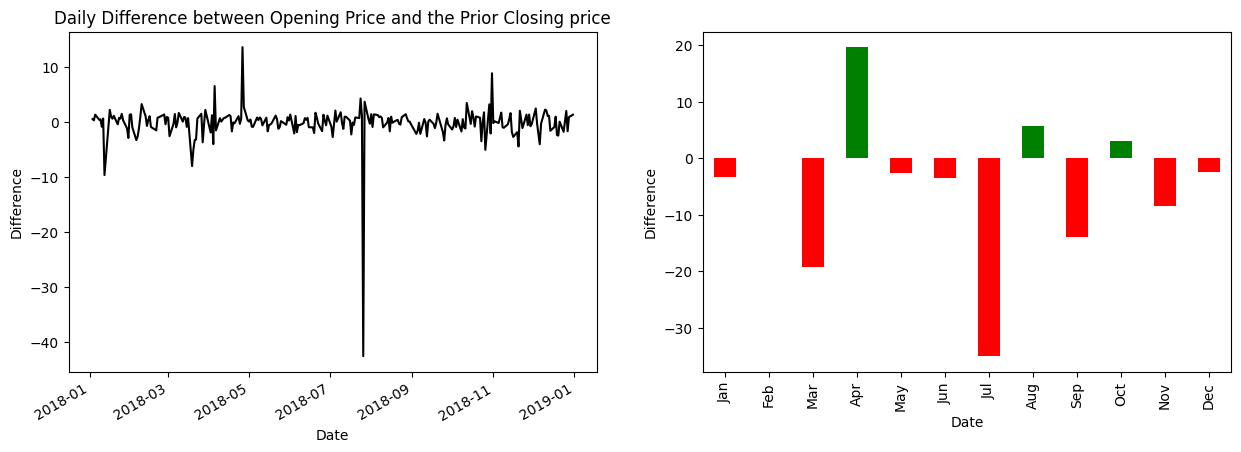

In [183]:
# subplots
fig, axes = plt.subplots(1,2) # creating 1 figure with 2 axes


#first subplot
daily_difference = fbprice.assign(
    openvsclose = lambda x:  x.open - x.close.shift()
) # getting Open - prior close
daily_difference.plot(
    legend = False,
    y = 'openvsclose',
    ax=axes[0],
    figsize =(15,5),
    style = 'k',
    ylabel="Difference",
    xlabel='Date',
    title = "Daily Difference between Opening Price and the Prior Closing price"
)

# second subplot
net_effect = daily_difference.resample('M').sum() # Resampling the (open-p_close)
net_effect.plot(
    kind ='bar',
    legend = False,
    y = 'openvsclose',
    ax=axes[1],
    figsize =(15,5),
    color = ['red' if value < 0 else 'green' for value in net_effect.openvsclose], # Bonus # 1
    ylabel="Difference",
    xlabel='Date'
)
axes[1].set_xticklabels(net_effect.index.strftime('%b')) # Bonus #2
net_effect.columns

## Summary/Conclusion:

- In conclusion this activity shows us ways the present our findins of data we cleaned in the prcess. This knwledge can be useful for improving comunication and storytelling skis when ncomes of analyzing the data.

# END